In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Read Dataset

In [212]:
df_airlines = pd.read_csv('airlines.csv', index_col=0)
df_airports = pd.read_csv('airports.csv', index_col=0)

In [213]:
df = pd.read_csv('flights.csv')
df

C:\Users\Yousef\AppData\Local\Temp\ipykernel_20272\1892132176.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [215]:
airlines_map = dict(zip(df_airlines.index, df_airlines['AIRLINE']))
airports_map = dict(zip(df_airports.index, df_airports['AIRPORT']))
airports_city_map = dict(zip(df_airports.index, df_airports['CITY']))
airports_state_map = dict(zip(df_airports.index, df_airports['STATE']))

In [216]:
# df['ORIGIN_CITY'] = df['ORIGIN_AIRPORT'].map(airports_city_map)
# df['STATE'] = df['ORIGIN_AIRPORT'].map(airports_state_map)

In [217]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
# this function for show the nan values in columns
def info_n(df):
    for i in df.columns:
        val = df[i].isna().sum()
        print(f'{i}: {val} : {round((val/len(df))*100, 2)}% ')    

In [219]:
info_n(df)

YEAR: 0 : 0.0% 
MONTH: 0 : 0.0% 
DAY: 0 : 0.0% 
DAY_OF_WEEK: 0 : 0.0% 
AIRLINE: 0 : 0.0% 
FLIGHT_NUMBER: 0 : 0.0% 
TAIL_NUMBER: 14721 : 0.25% 
ORIGIN_AIRPORT: 0 : 0.0% 
DESTINATION_AIRPORT: 0 : 0.0% 
SCHEDULED_DEPARTURE: 0 : 0.0% 
DEPARTURE_TIME: 86153 : 1.48% 
DEPARTURE_DELAY: 86153 : 1.48% 
TAXI_OUT: 89047 : 1.53% 
WHEELS_OFF: 89047 : 1.53% 
SCHEDULED_TIME: 6 : 0.0% 
ELAPSED_TIME: 105071 : 1.81% 
AIR_TIME: 105071 : 1.81% 
DISTANCE: 0 : 0.0% 
WHEELS_ON: 92513 : 1.59% 
TAXI_IN: 92513 : 1.59% 
SCHEDULED_ARRIVAL: 0 : 0.0% 
ARRIVAL_TIME: 92513 : 1.59% 
ARRIVAL_DELAY: 105071 : 1.81% 
DIVERTED: 0 : 0.0% 
CANCELLED: 0 : 0.0% 
CANCELLATION_REASON: 5729195 : 98.46% 
AIR_SYSTEM_DELAY: 4755640 : 81.72% 
SECURITY_DELAY: 4755640 : 81.72% 
AIRLINE_DELAY: 4755640 : 81.72% 
LATE_AIRCRAFT_DELAY: 4755640 : 81.72% 
WEATHER_DELAY: 4755640 : 81.72% 


#### Data Analysis


> The months with the most frequent flights ?

c:\Users\Yousef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The months with the most frequent flights')

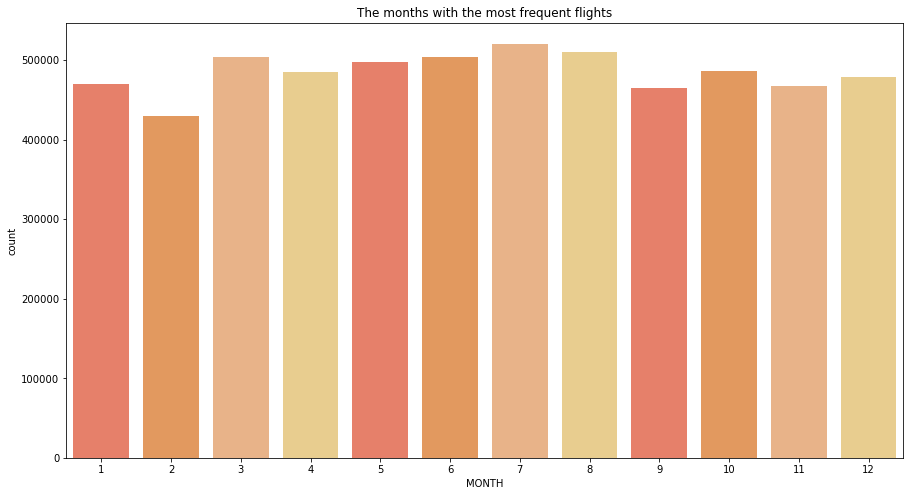

In [220]:
fig = plt.figure(figsize=[15,8])
sns.countplot(df['MONTH'], palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])
plt.title('The months with the most frequent flights')

> Q1\ The months with the most frequent cancelled flights ?

c:\Users\Yousef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The months with the most cancelled flights')

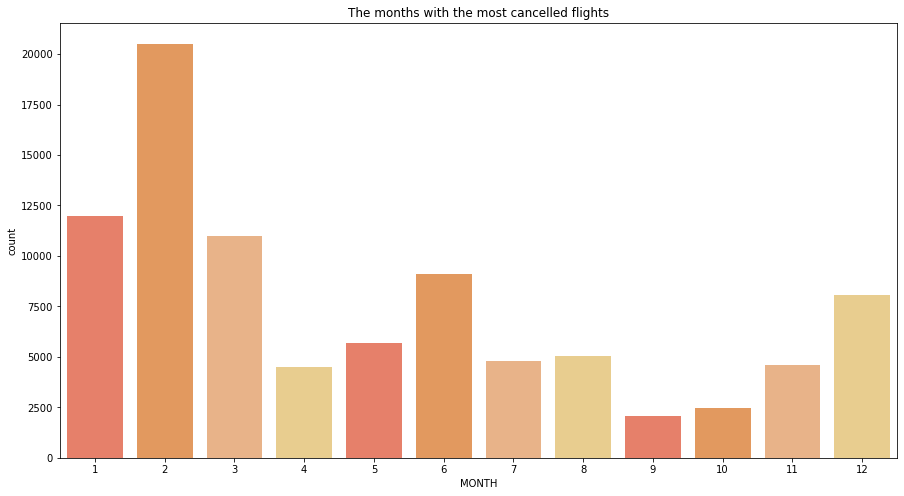

In [221]:
fig = plt.figure(figsize=[15,8])
df_ex = df[df['CANCELLED'] == 1]
sns.countplot(df_ex['MONTH'], palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])
plt.title('The months with the most cancelled flights')


> Q2\ The main reasons for delay flights ?

In [222]:
cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for i in cols:
    df[i] = df[i].replace(0,np.nan)

In [231]:
df_ex = []
for i in cols:
    df_ex.append(df.shape[0] - df[i].isna().sum())
df_ex = pd.DataFrame(df_ex,index=cols, columns=['count']).sort_values(by='count',ascending=False)
df_ex['percentage'] = round(df_ex['count']/df.shape[0]*100, 2)
df_ex

,count,percentage
AIRLINE_DELAY,570022,9.80
AIR_SYSTEM_DELAY,564826,9.71
LATE_AIRCRAFT_DELAY,556953,9.57
WEATHER_DELAY,64716,1.11
SECURITY_DELAY,3484,0.06


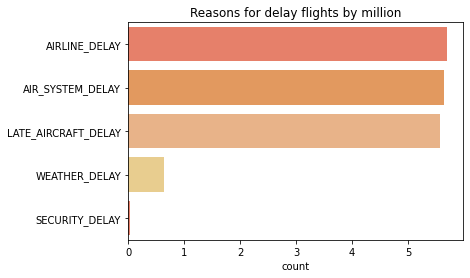

In [225]:
sns.barplot(x= df_ex['count']/100000, y=df_ex.index, palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])
plt.title('Reasons for delay flights by million')
plt.show() 

> Q3\ The main reasons for canceling flights ?

In [ ]:
df_ex = df['CANCELLATION_REASON'].value_counts()
df_ex

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

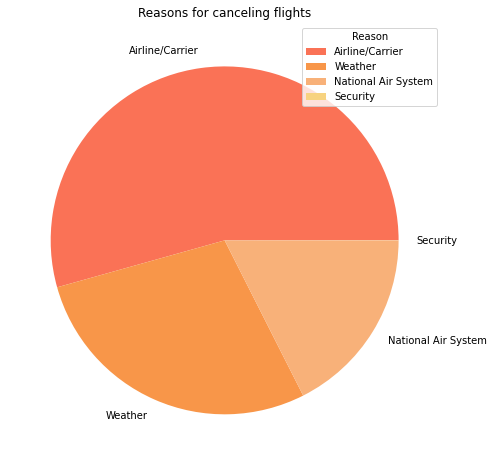

In [232]:
fig = plt.figure(figsize=[15,8])
df_ex = df['CANCELLATION_REASON'].value_counts()

plt.pie(df_ex, colors=['#FA7256', '#F89649', '#F8B179', '#F7D380'], labels=['Airline/Carrier', 'Weather', 'National Air System', 'Security'])
plt.legend(title='Reason')
plt.title('Reasons for canceling flights')
plt.show() 

In [ ]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
info_n(df)

YEAR: 0 : 0.0% 
MONTH: 0 : 0.0% 
DAY: 0 : 0.0% 
DAY_OF_WEEK: 0 : 0.0% 
AIRLINE: 0 : 0.0% 
FLIGHT_NUMBER: 0 : 0.0% 
TAIL_NUMBER: 14721 : 0.25% 
ORIGIN_AIRPORT: 0 : 0.0% 
DESTINATION_AIRPORT: 0 : 0.0% 
SCHEDULED_DEPARTURE: 0 : 0.0% 
DEPARTURE_TIME: 86153 : 1.48% 
DEPARTURE_DELAY: 86153 : 1.48% 
TAXI_OUT: 89047 : 1.53% 
WHEELS_OFF: 89047 : 1.53% 
SCHEDULED_TIME: 6 : 0.0% 
ELAPSED_TIME: 105071 : 1.81% 
AIR_TIME: 105071 : 1.81% 
DISTANCE: 0 : 0.0% 
WHEELS_ON: 92513 : 1.59% 
TAXI_IN: 92513 : 1.59% 
SCHEDULED_ARRIVAL: 0 : 0.0% 
ARRIVAL_TIME: 92513 : 1.59% 
ARRIVAL_DELAY: 105071 : 1.81% 
DIVERTED: 0 : 0.0% 
CANCELLED: 0 : 0.0% 
CANCELLATION_REASON: 5729195 : 98.46% 
AIR_SYSTEM_DELAY: 5254253 : 90.29% 
SECURITY_DELAY: 5815595 : 99.94% 
AIRLINE_DELAY: 5249057 : 90.2% 
LATE_AIRCRAFT_DELAY: 5262126 : 90.43% 
WEATHER_DELAY: 5754363 : 98.89% 


>Q4\ Most airlines cancelled flights ?

In [ ]:
df_ex = df['AIRLINE'].map(airlines_map).value_counts()
df_ex

Southwest Airlines Co.          1261855
Delta Air Lines Inc.             875881
American Airlines Inc.           725984
Skywest Airlines Inc.            588353
Atlantic Southeast Airlines      571977
United Air Lines Inc.            515723
American Eagle Airlines Inc.     294632
JetBlue Airways                  267048
US Airways Inc.                  198715
Alaska Airlines Inc.             172521
Spirit Air Lines                 117379
Frontier Airlines Inc.            90836
Hawaiian Airlines Inc.            76272
Virgin America                    61903
Name: AIRLINE, dtype: int64

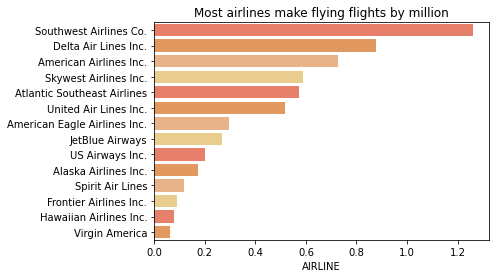

In [ ]:
sns.barplot(x=df_ex/1000000, y= df_ex.index, palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])
plt.title('Most airlines make flying flights by million')
plt.show() 

In [ ]:
df_ex = df[df['CANCELLED'] == 1]['AIRLINE'].map(airlines_map).value_counts()
df_ex

Southwest Airlines Co.          16043
Atlantic Southeast Airlines     15231
American Eagle Airlines Inc.    15025
American Airlines Inc.          10919
Skywest Airlines Inc.            9960
United Air Lines Inc.            6573
JetBlue Airways                  4276
US Airways Inc.                  4067
Delta Air Lines Inc.             3824
Spirit Air Lines                 2004
Alaska Airlines Inc.              669
Frontier Airlines Inc.            588
Virgin America                    534
Hawaiian Airlines Inc.            171
Name: AIRLINE, dtype: int64

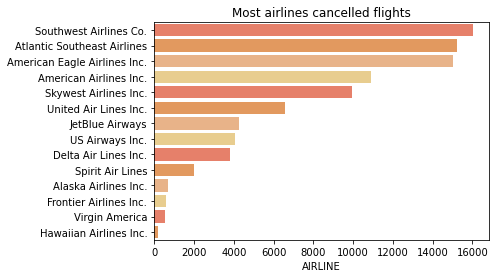

In [ ]:
sns.barplot(x=df_ex, y= df_ex.index, palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])
plt.title('Most airlines cancelled flights')
plt.show() 

> Q5\ Most of the cities where flying flights are cancelled ?

In [ ]:
df_ex = df['ORIGIN_AIRPORT'].map(airports_city_map).value_counts()
df_ex

Chicago              366770
Atlanta              346836
Dallas-Fort Worth    239551
Houston              198664
Denver               196055
                      ...  
Hyannis                  83
Dillingham               77
Gustavus                 77
King Salmon              63
Ithaca                   34
Name: ORIGIN_AIRPORT, Length: 308, dtype: int64

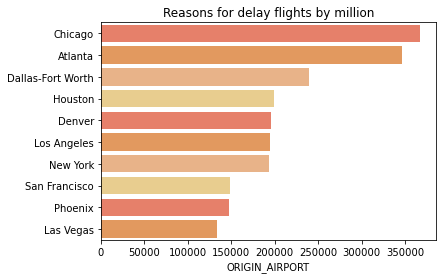

In [ ]:
sns.barplot(x=df_ex[:10], y= df_ex.index[:10], palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])
plt.title('Reasons for delay flights by million')
plt.show() 

In [ ]:
df_ex = df[df['CANCELLED'] == 1]['ORIGIN_AIRPORT'].map(airports_city_map).value_counts()
df_ex

Chicago              10507
New York              6453
Dallas-Fort Worth     6254
Newark                3110
Houston               2904
                     ...  
Plattsburgh              2
Cedar City               1
Moab                     1
Hyannis                  1
Gustavus                 1
Name: ORIGIN_AIRPORT, Length: 302, dtype: int64

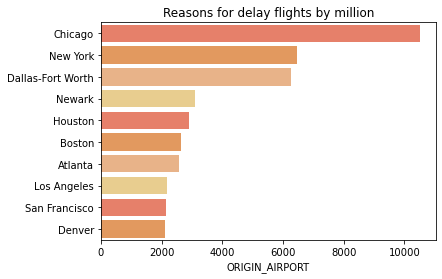

In [ ]:
sns.barplot(x=df_ex[:10], y= df_ex.index[:10], palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])
plt.title('Reasons for delay flights by million')
plt.show() 

#### state

In [ ]:
df_ex = df[df['CANCELLED'] == 1]['ORIGIN_AIRPORT'].map(airports_state_map).value_counts()

df_2 = pd.DataFrame(index=df_ex.index[:5])
df_2['cancel'] = df_ex[:5]
df_ex = df['ORIGIN_AIRPORT'].map(airports_state_map).value_counts()

df_2['all'] = df_ex

df_2['percentage%'] = round(df_2['cancel']/df_2['all']*100)
df_2

,cancel,all,percentage%
TX,12826,631124,2.0
IL,11095,381644,3.0
CA,8074,647911,1.0
NY,7704,246235,3.0
FL,4596,415586,1.0


In [ ]:
del df_2

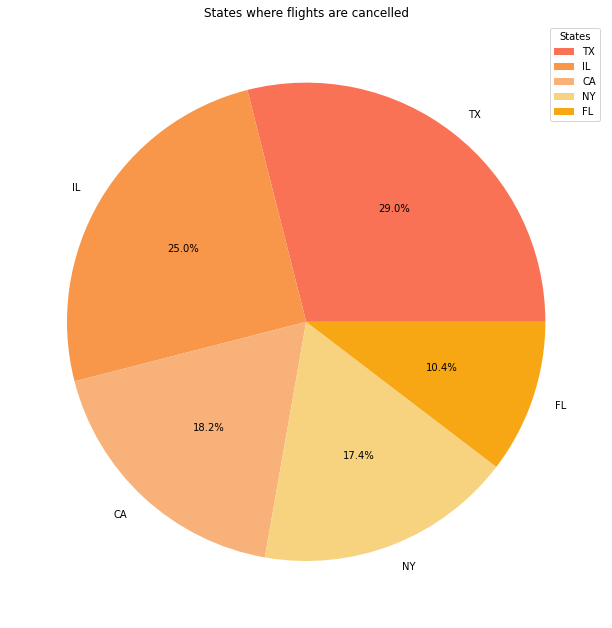

In [ ]:
fig = plt.figure(figsize=[15,11])
df_ex = df[df['CANCELLED'] == 1]['ORIGIN_AIRPORT'].map(airports_state_map).value_counts()
plt.pie(df_ex[:5], colors=['#FA7256', '#F89649', '#F8B179', '#F7D380', '#F8A714'], autopct='%1.1f%%', labels=df_ex.index[:5])
plt.legend(title='States')
plt.title('States where flights are cancelled')
plt.show() 

> Q6\ Most airports cancelled flights ?

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

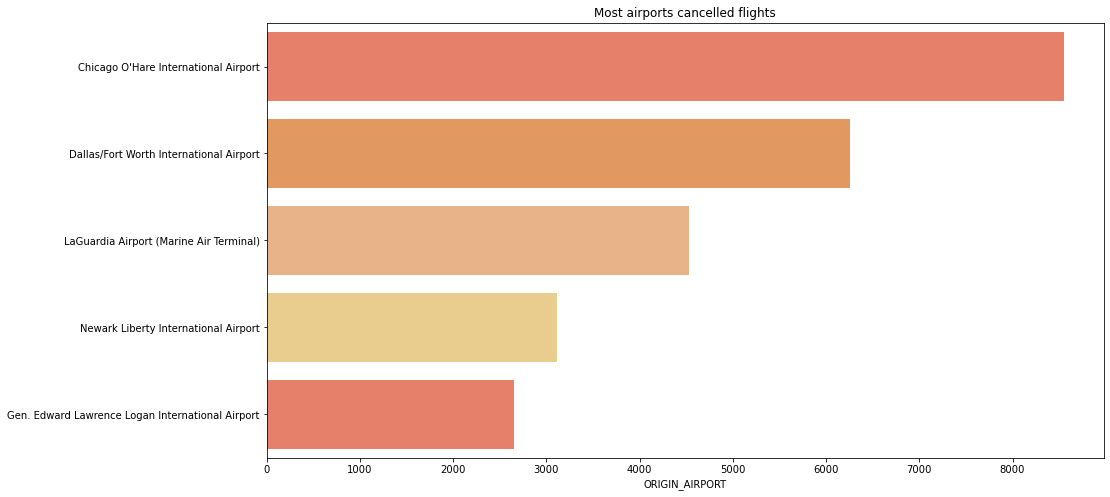

In [256]:
fig = plt.figure(figsize=[15,8])
df_ex = df[df['CANCELLED'] == 1]['ORIGIN_AIRPORT'].map(airports_map).value_counts()
sns.barplot(x=df_ex[:5], y= df_ex.index[:5], palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])
plt.title('Most airports cancelled flights')
plt.show() 